In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from keras.callbacks import EarlyStopping


2024-05-03 12:50:50.853660: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-03 12:51:01.778721: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-05-03 12:51:01.778908: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-05-03 12:51:01.778919: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
linkAutoencoder = "Resultados/ModelosAutoencoder/V1W10"

In [3]:

#Load the encoder model
encoder_model = keras.models.load_model(linkAutoencoder+"/Encoder.h5")

#Load the decoder model
decoder_model = keras.models.load_model(linkAutoencoder+"/Decoder.h5")

#Load the dataset
x = np.load("/media/mccdual2080/Almacenamiengto/SahirProjects/SahirReyes/dataSetAutoencoder/DatasetAutoencoder/DataSetLatentSpace/Npy/Balanced/V1/Dataset120x360GreysNewCategories.npy")
print("x shape",x.shape)
x = x/255

print("min", np.min(x))
print("max", np.max(x))

2024-05-03 12:51:13.595489: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-03 12:51:13.596319: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-03 12:51:14.294724: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-03 12:51:14.296261: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-03 12:51:14.297327: I tensorflow/compiler/xla/stream_executo

x shape (1254, 120, 360)
min 0.07058824
max 0.91764706


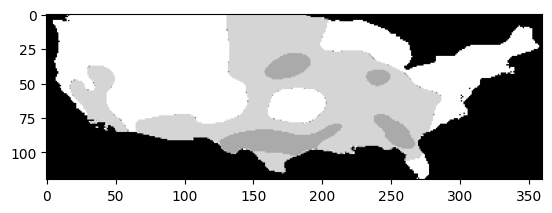

In [4]:
plt.imshow(x[0],cmap="gray")

In [10]:
#Encode the dataset
print("x shape",x.shape)
x = x.reshape(x.shape[0],120,360,1)
x_encoded = encoder_model.predict(x)
print("x_encoded shape",x_encoded.shape)

print("x max",np.max(x))
print("x min",np.min(x))
print("x_encoded max",np.max(x_encoded))
print("x_encoded min",np.min(x_encoded))
print("x dtype",x.dtype)
print("x_encoded dtype",x_encoded.dtype)
#Save the encoded dataset
np.save(linkAutoencoder+"/Dataset120x360Encoded.npy",x_encoded)


x shape (1254, 120, 360)
40/40 [==============================] - 0s 3ms/step
x_encoded shape (1254, 60, 180, 4)
x max 0.91764706
x min 0.07058824
x_encoded max 0.9946292
x_encoded min 0.01184088
x dtype float32
x_encoded dtype float32


In [12]:
print("x_encoded shape",x_encoded.shape)

x_encoded shape (1254, 60, 180, 4)


x_encoded shape (1254, 60, 180, 4)


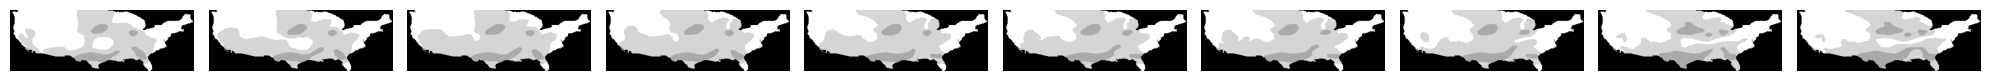

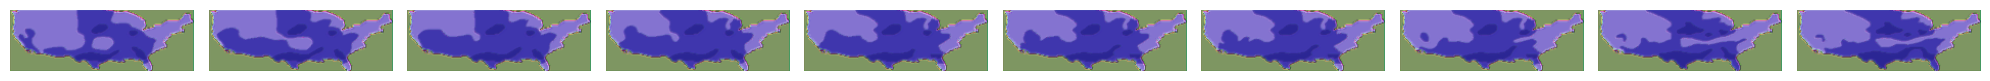

In [15]:
#mostrar imagenes del npy
def plotImages(images_arr , cmap = "gray"):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img, cmap = cmap)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

x_encoded = np.squeeze(x_encoded)
print("x_encoded shape",x_encoded.shape)
plotImages(x[0:10],cmap="gray")
plotImages(x_encoded[0:10],cmap="gray")

img373 shape (120, 360)


<Figure size 2000x2000 with 0 Axes>

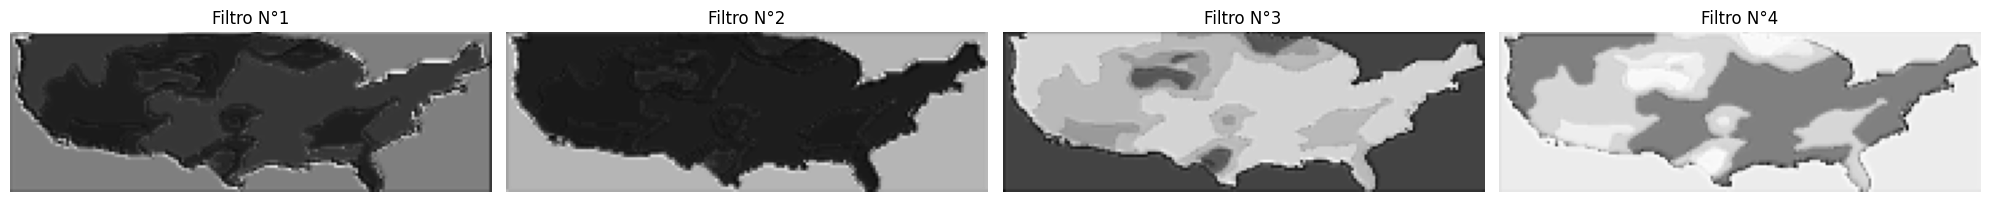

In [26]:
fig = plt.figure(figsize=(20,20))
r = 3
c = 4
ac = 1
pos = 373
horizon = 4

img373 = x[pos,:,:,0]
print("img373 shape",img373.shape)

fig = plt.figure(figsize=(20,20))
for i in range(horizon):
    ax = fig.add_subplot(r, c, ac)
    ax.imshow(x_encoded[pos,:,:,i], cmap='gray')
    ax.axis('off')
    ax.set_title('Filtro N°{}'.format(i+1))
    ac += 1
plt.tight_layout()
plt.show()